# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combine_data = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview

combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.

combine_data['Mouse ID'].nunique()

249

In [59]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse_ids = combine_data[combine_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combine_data[combine_data['Mouse ID'].isin(duplicated_mouse_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = combine_data[~combine_data['Mouse ID'].isin(duplicated_mouse_ids)]
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice in the clean DataFrame.

cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regiment = cleaned_df.groupby('Drug Regimen')

# Calculate statistics 

mean_tumor_volume = drug_regiment['Tumor Volume (mm3)'].mean()
median_tumor_volumen = drug_regiment['Tumor Volume (mm3)'].median()
variance_tumor = drug_regiment['Tumor Volume (mm3)'].var()
std_tumor_volume = drug_regiment['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_regiment['Tumor Volume (mm3)'].sem()

drug_regiment_summary = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volumen,
    'Tumor Volume Variance': variance_tumor,
    'Tumor Volume Std. Dev': std_tumor_volume,
    'Tumor Volume Std. Err': sem_tumor_volume
})

drug_regiment_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_regiment_agg = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regiment_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

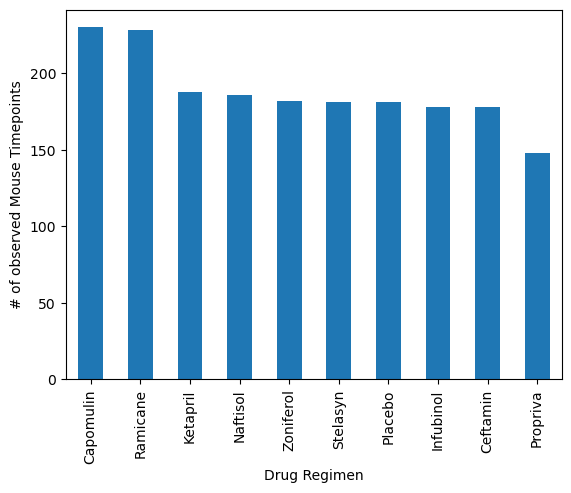

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar')
plt.ylabel('# of observed Mouse Timepoints')

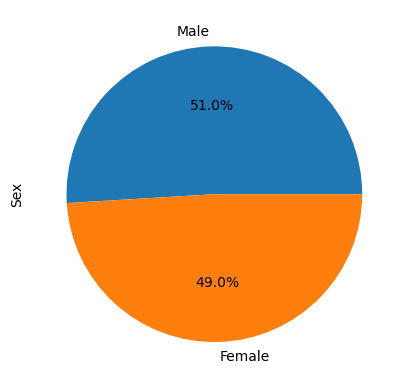

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = cleaned_df['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

regimes = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(regimes)]

last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

merged_df = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [68]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    upper_bound = upperq + (1.5 * iqr)
    lower_bound = lowerq - (1.5 * iqr)
    
    outliers = tumor_volumes[(tumor_volumes < lowerq) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 24    30.485985
51    28.430964
70    23.343598
78    31.023923
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 27    29.128472
40    22.050126
50    30.564625
54    31.095335
71    30.276232
98    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 15    36.321346
52    47.010364
58    45.699331
79    46.250112
81    51.542431
85    50.005138
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: 10    45.000000
28    47.784682
46    46.784535
74    45.000000
76    45.000000
89    45.000000
Name: Tumor Volume (mm3), dtype: float64


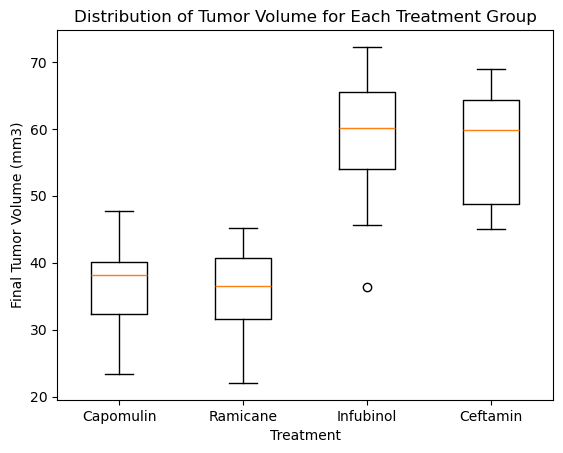

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


plt.boxplot(tumor_vol, labels=treatments)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

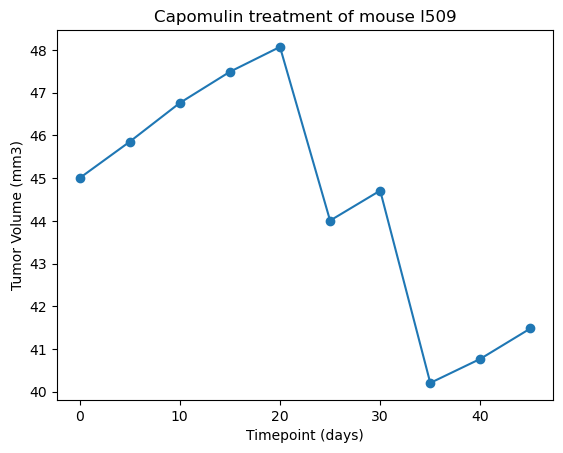

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse = 'l509'
capomulin = cleaned_df[(cleaned_df['Mouse ID'] == mouse) & (cleaned_df['Drug Regimen'] == 'Capomulin')]
plt.plot(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'], marker='o')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

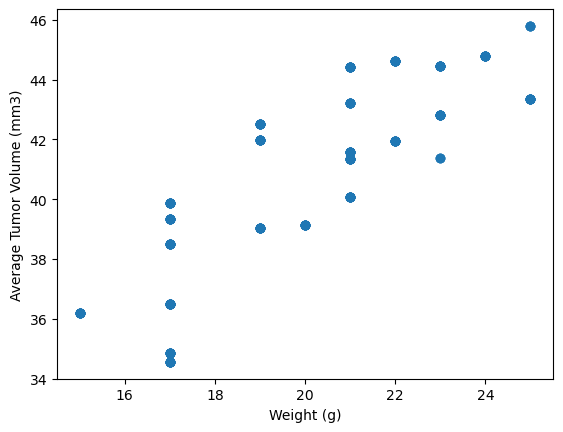

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_mouse = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


new_merged = pd.merge(avg_mouse, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')


plt.scatter(new_merged['Weight (g)'], new_merged['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.83


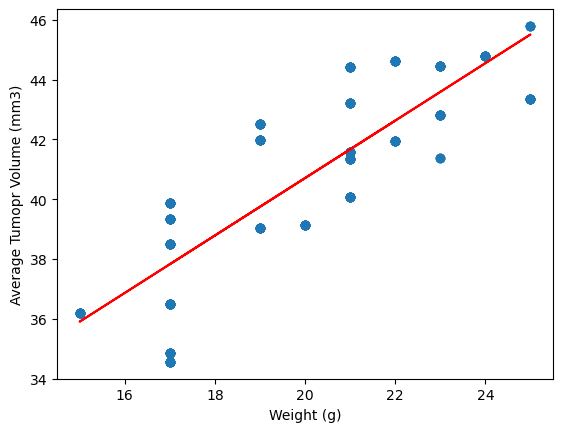

In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
correlation = new_merged['Weight (g)'].corr(new_merged['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is: {round(correlation,2)}")

slope, intercept, r_value, p_value, std_err = linregress(new_merged['Weight (g)'], new_merged['Tumor Volume (mm3)'])
plt.scatter(new_merged['Weight (g)'], new_merged['Tumor Volume (mm3)'], marker='o', label='Data points')

regression_line = slope * new_merged['Weight (g)'] + intercept

plt.plot(new_merged['Weight (g)'], regression_line, color='red', label='Regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumopr Volume (mm3)')
plt.show()